# Imports

In [1]:
import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

## RIR data

In [2]:
rir = pd.read_csv("../data/rir.csv")

In [3]:
rir.head()

,Country,cc,cc3,rir
0,AFGHANISTAN,AF,AFG,APNIC
1,ALBANIA,AL,ALB,RIPE NCC
2,ALGERIA,DZ,DZA,AFRINIC
3,AMERICAN SAMOA,AS,ASM,APNIC
4,ANDORRA,AD,AND,RIPE NCC


## state-owned ASes

In [4]:
soe = pd.read_csv("../data/soe/state_owned_ases.csv")
soe.head()

,asn,conglomerate,org_id,org_name,ownership_cc,ownership_country_name,rir,source,quote,quote_lang,url,additional_info,inputs,parent_org,target_cc,target_country_name
0,18678,CO-IXA,@aut-18678-LACNIC,INTERNEXA S.A. E.S.P,CO,Colombia,LACNIC,Company's website,Estructura accionaria. Gobierno colombiano: 51.41,Spanish,http://www.isa.co/es/nuestra-compania/Paginas/...,NaN,"W, O",NaN,NaN,NaN
1,262195,CO-IXA,@aut-262195-LACNIC,Transamerican Telecomunication S.A.,CO,Colombia,LACNIC,Company's website,Estructura accionaria. Gobierno colombiano: 51.42,Spanish,http://www.isa.co/es/nuestra-compania/Paginas/...,NaN,"W, O",CO-IESA-LACNIC,AR,Argentina
2,262589,CO-IXA,@aut-262589-LACNIC,INTERNEXA BRASIL OPERADORA DE TELECOMUNICACOES...,CO,Colombia,LACNIC,Company's website,Estructura accionaria. Gobierno colombiano: 51.43,Spanish,http://www.isa.co/es/nuestra-compania/Paginas/...,NaN,"W, O",CO-IESA-LACNIC,BR,Brazil
3,28032,CO-IXA,@aut-28032-LACNIC,INTERNEXA PERU S.A,CO,Colombia,LACNIC,Company's website,Estructura accionaria. Gobierno colombiano: 51.44,Spanish,http://www.isa.co/es/nuestra-compania/Paginas/...,NaN,"W, O",CO-IESA-LACNIC,PE,Peru
4,52280,CO-IXA,@aut-52280-LACNIC,INTERNEXA Chile S.A.,CO,Colombia,LACNIC,Company's website,Estructura accionaria. Gobierno colombiano: 51.45,Spanish,http://www.isa.co/es/nuestra-compania/Paginas/...,NaN,"W, O",CO-IESA-LACNIC,CL,Chile


## Access network sizes

### Geolocated address space

In [5]:
geoloc = pd.read_csv("../data/access-networks/geolocation_asn.csv")

In [6]:
geoloc.head()

,asn,cc,cc_frac
0,715,ZW,0.014205
1,327770,ZW,0.340922
2,36183,ZW,0.017756
3,34800,ZW,0.000222
4,328646,ZW,0.056820


### APNIC eyeballs estimations

In [7]:
def remove_as_str(x):
    if str(x)[:2] == "AS":
        return int(float(str(x)[2:]))
    else: 
        return 0

In [8]:
eyeballs = pd.read_csv("../data/access-networks/2022_03_22.csv")
eyeballs["asn"] = eyeballs["asn"].map(remove_as_str)

# Social variables

In [14]:
social_vars = pd.read_csv("../data/polisci/politicalshutdowns_whoshutsdata_2018_2021.csv")

In [15]:
social_vars.head()

,Country.Code,year,totalshutdowns,nationalshutdowns,politicalshutdowns,nationalpoliticalshutdowns,country,FDI,GDP,oilreserves_bbl,...,nationalnonpoliticalshutdowns,nonpoliticalshutdowns,shutdownind,national_shutdownind,regional_shutdownind,nationalpolitical_shutdownind,regionalpolitical_shutdownind,political_shutdownind,nonpolitical_shutdownind,nationalnonpolitical_shutdownind
0,ABW,2019,3,3,0,0,Aruba,-7.522654e+07,3.368970e+09,NaN,...,3,3,True,True,False,False,False,False,True,True
1,ABW,2020,1,1,0,0,Aruba,1.640876e+08,2.610039e+09,NaN,...,1,1,True,True,False,False,False,False,True,True
2,AFG,2019,3,3,0,0,Afghanistan,2.340455e+07,1.890449e+10,NaN,...,3,3,True,True,False,False,False,False,True,True
3,AFG,2020,3,3,0,0,Afghanistan,1.297015e+07,2.014344e+10,NaN,...,3,3,True,True,False,False,False,False,True,True
4,AFG,2021,4,1,1,0,Afghanistan,2.060098e+07,1.478686e+10,NaN,...,1,3,True,True,True,False,True,True,True,True


# Compute states' stake on the domestic access market

In [16]:
soe_geoloc = soe[["asn", "ownership_cc",]].join(
    geoloc[["asn", "cc", "cc_frac"]].set_index(["asn", "cc",]),
    on=["asn", "ownership_cc",],
    how='left',
    lsuffix='_matrix',
    rsuffix='_ingress'
)

soe_geoloc = soe_geoloc.dropna()

In [17]:
soe_geoloc.head()

,asn,ownership_cc,cc_frac
0,18678,CO,0.815676
1,262195,CO,0.001239
2,262589,CO,0.110259
5,10269,BZ,52.086699
6,6568,BO,20.711639


In [18]:
soe_geoloc_addr = soe_geoloc.groupby("ownership_cc")["cc_frac"] \
    .sum() \
    .reset_index()

In [19]:
soe_geoloc_addr.head()

,ownership_cc,cc_frac
0,AD,90.376241
1,AE,91.292944
2,AF,9.291136
3,AG,21.120916
4,AO,20.581215


In [20]:
soe_geoloc_addr = rir[["cc", ]].join(
    soe_geoloc_addr.set_index(["ownership_cc",]),
    on=["cc",],
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)

soe_geoloc_addr = soe_geoloc_addr.fillna(0)

In [21]:
soe_geoloc_addr.head()

,cc,cc_frac
0,AF,9.291136
1,AL,0.000000
2,DZ,96.272882
3,AS,0.000000
4,AD,90.376241


In [22]:
soe_geoloc_addr = soe_geoloc_addr.sort_values("cc_frac")
soe_geoloc_addr = soe_geoloc_addr.rename(columns = {'cc_frac':'soe_geoloc'})

## Domestic footprint

In [23]:
soe_eyeballs = soe.drop_duplicates()[["asn", "ownership_cc",]].join(
    eyeballs.drop_duplicates()[["asn", "cc", "cc_frac"]].set_index(["asn", "cc",]),
    on=["asn", "ownership_cc",],
    how='left',
    lsuffix='_matrix',
    rsuffix='_ingress'
)

soe_eyeballs = soe_eyeballs.dropna()

In [24]:
soe_eyeballs.head()

,asn,ownership_cc,cc_frac
0,18678,CO,0.90
2,262589,CO,0.89
5,10269,BZ,51.47
6,6568,BO,37.03
7,53237,BR,0.05


### Fraction of the domestic eyeballs in state-owned networks

In [25]:
soe_eyeballs_addr = soe_eyeballs.groupby("ownership_cc")["cc_frac"] \
    .sum() \
    .reset_index()

In [26]:
soe_eyeballs_addr.head()

,ownership_cc,cc_frac
0,AD,98.54
1,AE,96.03
2,AF,13.70
3,AG,62.96
4,AO,15.69


I expand it to all countries and not just to the subset of countries with state-owned providers

In [27]:
soe_eyeballs_addr = rir[["cc", ]].join(
    soe_eyeballs_addr.set_index(["ownership_cc",]),
    on=["cc",],
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)

soe_eyeballs_addr = soe_eyeballs_addr.fillna(0)

In [28]:
soe_eyeballs_addr.head()

,cc,cc_frac
0,AF,13.70
1,AL,0.00
2,DZ,87.14
3,AS,0.00
4,AD,98.54


In [29]:
soe_eyeballs_addr = soe_eyeballs_addr.sort_values("cc_frac")
soe_eyeballs_addr = soe_eyeballs_addr.rename(columns = {'cc_frac':'soe_eyeballs'})

# Augmented social variables

In [30]:
social_vars = rir[["cc", "cc3"]].join(
    social_vars.set_index(["Country.Code",]),
    on=["cc3",],
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)

In [31]:
social_vars = social_vars.join(
    soe_geoloc_addr.set_index(["cc",]),
    on=["cc",],
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)

In [32]:
social_vars = social_vars.join(
    soe_eyeballs_addr.set_index(["cc",]),
    on=["cc",],
    how='left',
    lsuffix='_left',
    rsuffix='_right'
)

In [33]:
social_vars.head()

,cc,cc3,year,totalshutdowns,nationalshutdowns,politicalshutdowns,nationalpoliticalshutdowns,country,FDI,GDP,...,shutdownind,national_shutdownind,regional_shutdownind,nationalpolitical_shutdownind,regionalpolitical_shutdownind,political_shutdownind,nonpolitical_shutdownind,nationalnonpolitical_shutdownind,soe_geoloc,soe_eyeballs
0,AF,AFG,2019.0,3.0,3.0,0.0,0.0,Afghanistan,2.340455e+07,1.890449e+10,...,True,True,False,False,False,False,True,True,9.291136,13.7
0,AF,AFG,2020.0,3.0,3.0,0.0,0.0,Afghanistan,1.297015e+07,2.014344e+10,...,True,True,False,False,False,False,True,True,9.291136,13.7
0,AF,AFG,2021.0,4.0,1.0,1.0,0.0,Afghanistan,2.060098e+07,1.478686e+10,...,True,True,True,False,True,True,True,True,9.291136,13.7
0,AF,AFG,2018.0,0.0,0.0,0.0,0.0,NaN,1.194351e+08,1.841885e+10,...,False,False,False,False,False,False,False,False,9.291136,13.7
1,AL,ALB,2019.0,1.0,0.0,0.0,0.0,Albania,1.201022e+09,1.540183e+10,...,True,False,True,False,False,False,True,False,0.000000,0.0


I transform some continous into binary variables

In [34]:
social_vars["geoloc"] = social_vars["soe_geoloc"] > 50 

In [35]:
social_vars["eyeballs"] = social_vars["soe_eyeballs"] > 50 

In [36]:
social_vars["pms"] = social_vars["nationalpoliticalshutdowns"] > 0

In [37]:
social_vars["npms"] = (social_vars["nationalpoliticalshutdowns"] == 0) & (social_vars["nationalshutdowns"] > 0)

In [38]:
social_vars.groupby(["pms", "geoloc", "year"]).median()

TypeError: could not convert string to float: 'AF'

In [46]:
#plt.rcParams["font.family"] = "Times New Roman"
fontsize=16

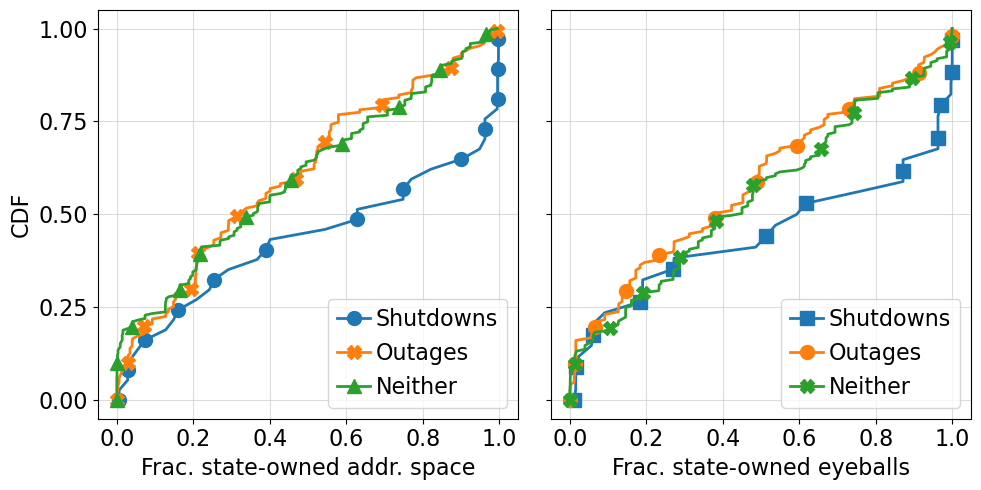

In [60]:
fig, _ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)


m = itertools.cycle(["o", "X", "^", "s"])

####

ax = _ax[0]

x = social_vars.loc[(social_vars["pms"] == True) & (social_vars["soe_geoloc"] > 0)]["soe_geoloc"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["npms"] == True) & (social_vars["soe_geoloc"] > 0)]["soe_geoloc"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["totalshutdowns"] == 0) & (social_vars["soe_geoloc"] > 0)]["soe_geoloc"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


# ax.set_title(v, fontsize=20)

ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Frac. state-owned addr. space", fontsize=fontsize)
ax.set_ylabel("CDF", fontsize=fontsize)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='lower right', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)

####
ax.tick_params(labelsize=fontsize)
ax = _ax[1]

x = social_vars.loc[(social_vars["pms"] == True) & (social_vars["soe_eyeballs"] > 0)]["soe_eyeballs"]

ax.plot(
    np.sort(x)  / 100,
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["npms"] == True) & (social_vars["soe_eyeballs"] > 0)]["soe_eyeballs"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["totalshutdowns"] == 0) & (social_vars["soe_eyeballs"] > 0)]["soe_eyeballs"]

ax.plot(
    np.sort(x) / 100,
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


# ax.set_title(v, fontsize=20)

ax.tick_params(labelsize=fontsize)

ax.set_xlabel("Frac. state-owned eyeballs", fontsize=fontsize)
# ax.set_ylabel("CDF", fontsize=20)

ax.set_yticks(np.arange(0, 1.01, 0.25))

ax.legend(loc='lower right', ncol=1,
              frameon=True, fontsize=fontsize, handletextpad=0.25, columnspacing=0.5, 
              handlelength=1.5)

        
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("../figures/outage_scas.pdf")

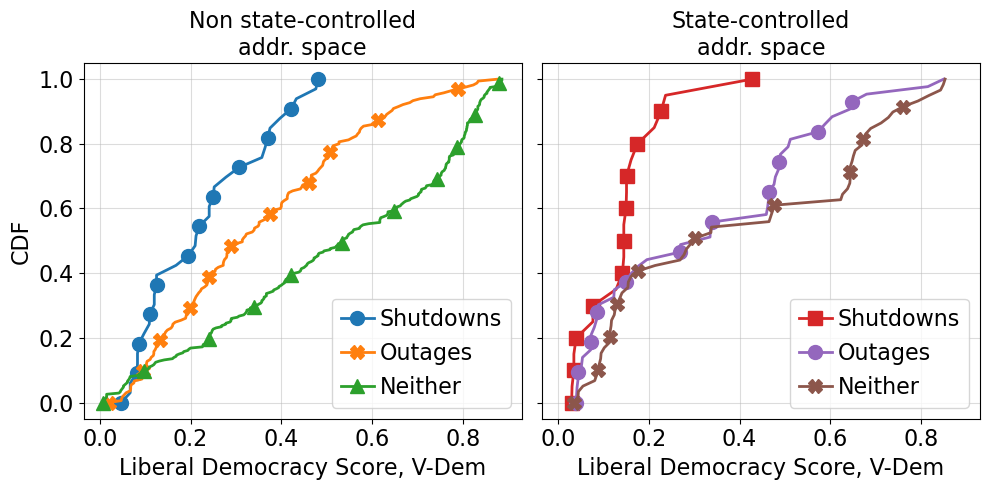

In [57]:
fig, _ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

m = itertools.cycle(["o", "X", "^", "s"])

v = "v2x_libdem"

####  

ax = _ax[0]

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


x = social_vars.loc[(social_vars["pms"] == True) & (social_vars["geoloc"] == False)][v]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["npms"] == True) & (social_vars["geoloc"] == False) & (~social_vars[v].isnull())][v]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["totalshutdowns"] == 0) & (social_vars["geoloc"] == False) & (~social_vars[v].isnull())][v]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    lw=2,
    markersize=10
)

ax.tick_params(labelsize=fontsize)

ax.set_title("Non state-controlled\naddr. space", fontsize=fontsize)
ax.set_xlabel("Liberal Democracy Score, V-Dem", fontsize=fontsize)
ax.set_ylabel("CDF", fontsize=fontsize)

ax.legend(loc='lower right', ncol=1, frameon=True, 
          fontsize=fontsize, handletextpad=0.25, 
          columnspacing=0.5, handlelength=1.5)

###

ax = _ax[1]

ax.yaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')
ax.xaxis.grid(True, linestyle='-', color='#bababa', alpha=0.5, which='both')


x = social_vars.loc[(social_vars["pms"] == True) 
                    & (social_vars["geoloc"] == True)
                    & (~social_vars[v].isnull())][v]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Shutdowns",
    marker=next(m),
    markevery = int(len(x) / 10),
    color="C3",
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["npms"] == True) & (social_vars["geoloc"] == True) & (~social_vars[v].isnull())][v]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Outages",
    marker=next(m),
    markevery = int(len(x) / 10),
    color="C4",
    lw=2,
    markersize=10
)

x = social_vars.loc[(social_vars["totalshutdowns"] == 0) & (social_vars["geoloc"] == True) & (~social_vars[v].isnull())][v]

ax.plot(
    np.sort(x),
    np.linspace(0, 1, len(x)),
    label="Neither",
    marker=next(m),
    markevery = int(len(x) / 10),
    color="C5",
    lw=2,
    markersize=10
)

ax.tick_params(labelsize=fontsize)
ax.set_xlabel("Liberal Democracy Score, V-Dem", fontsize=fontsize)
ax.set_title("State-controlled\naddr. space", fontsize=fontsize)

ax.legend(loc='lower right', ncol=1, frameon=True, 
          fontsize=fontsize, handletextpad=0.25, 
          columnspacing=0.5, handlelength=1.5)


###

#fig.suptitle("Liberal democracy index", fontsize=25)
        
fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("../figures/libdem_scas.pdf")

In [82]:
x = social_vars.loc[(social_vars["pms"] == True) & (social_vars["geoloc"] == False)][v]
y = social_vars.loc[(social_vars["pms"] == True) & (social_vars["geoloc"] == True)][v]

print("Average LibDem index")
print(f"PMS and SOE addr space > 50\%: {x.mean():.2f}")
print(f"PMS and SOE addr space < 50\%: {y.mean():.2f}")
print()
print("Median LibDem index")
print(f"PMS and SOE addr space > 50\%: {x.median():.2f}")
print(f"PMS and SOE addr space < 50\%: {y.median():.2f}")
print()
print("Std. LibDem index")
print(f"PMS and SOE addr space > 50\%: {x.std():.2f}")
print(f"PMS and SOE addr space < 50\%: {y.std():.2f}")


Average LibDem index
PMS and SOE addr space > 50\%: 0.22
PMS and SOE addr space < 50\%: 0.14

Median LibDem index
PMS and SOE addr space > 50\%: 0.21
PMS and SOE addr space < 50\%: 0.14

Std. LibDem index
PMS and SOE addr space > 50\%: 0.13
PMS and SOE addr space < 50\%: 0.09


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2b9a2535-ed0e-48ec-8277-3dc0993a1e10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>